# Intro to Scikit Learn

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
print(os.getcwd())
os.chdir("C:\\Users\\adivy\\Desktop\\PyLearn_Projects")

C:\Users\adivy\Desktop\PyLearn_Projects\ipynb files


In [3]:
os.getcwd()

'C:\\Users\\adivy\\Desktop\\PyLearn_Projects'

In [4]:
#Get data ready
heart_disease = pd.read_csv("csvdocs/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
# Create a features matrix (X)
X = heart_disease.drop("target", axis = 1)

#Create labels (Y)
Y = heart_disease["target"]

In [6]:
from sklearn.ensemble import RandomForestClassifier as RFC
clf = RFC()

#Keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
#Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [8]:
clf.fit(X_train, Y_train);

In [9]:
# Make a prediction
y_pred = clf.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [10]:
#Evaluate the score or the accuracy of the model using training data
clf.score(X_train, Y_train)

1.0

In [11]:
clf.score(X_test, Y_test)

0.8360655737704918

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        24
           1       0.85      0.89      0.87        37

    accuracy                           0.84        61
   macro avg       0.83      0.82      0.83        61
weighted avg       0.84      0.84      0.83        61



In [13]:
confusion_matrix(Y_test,y_pred)

array([[18,  6],
       [ 4, 33]])

In [14]:
accuracy_score(Y_test, y_pred)

0.8360655737704918

In [15]:
# Improve our model by 
# 1) Changing the n_estimators
from sklearn.ensemble import RandomForestClassifier as RFC
np.random.seed(20)
for i in range(10, 100, 10):
    clf = RFC(n_estimators = i).fit(X_train, Y_train)
    print(f"The accuracy score for {i} estimators is: {clf.score(X_test, Y_test) * 100} \n")

The accuracy score for 10 estimators is: 85.24590163934425 

The accuracy score for 20 estimators is: 88.52459016393442 

The accuracy score for 30 estimators is: 85.24590163934425 

The accuracy score for 40 estimators is: 85.24590163934425 

The accuracy score for 50 estimators is: 81.9672131147541 

The accuracy score for 60 estimators is: 86.88524590163934 

The accuracy score for 70 estimators is: 86.88524590163934 

The accuracy score for 80 estimators is: 88.52459016393442 

The accuracy score for 90 estimators is: 86.88524590163934 



In [16]:
# Save a model and load it
import pickle

pickle.dump(clf, open("pickledumps/RandForClass1.pkl","wb"))

In [17]:
loadmodel = pickle.load(open("pickledumps/RandForClass1.pkl","rb"))

In [18]:
loadmodel

RandomForestClassifier(n_estimators=90)

In [19]:
loadmodel.score(X_test,Y_test)

0.8688524590163934

In [20]:
import sklearn
sklearn.show_versions()


System:
    python: 3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]
executable: C:\Users\adivy\Desktop\PyLearn_Projects\env\python.exe
   machine: Windows-11-10.0.26100-SP0

Python dependencies:
      sklearn: 1.6.1
          pip: 24.2
   setuptools: 72.1.0
        numpy: 2.2.4
        scipy: 1.15.2
       Cython: None
       pandas: 2.2.3
   matplotlib: 3.10.0
       joblib: 1.4.2
threadpoolctl: 3.6.0

Built with OpenMP: True

threadpoolctl info:
       user_api: openmp
   internal_api: openmp
    num_threads: 12
         prefix: vcomp
       filepath: C:\Users\adivy\AppData\Roaming\Python\Python312\site-packages\sklearn\.libs\vcomp140.dll
        version: None

       user_api: blas
   internal_api: openblas
    num_threads: 12
         prefix: libscipy_openblas
       filepath: C:\Users\adivy\AppData\Roaming\Python\Python312\site-packages\numpy.libs\libscipy_openblas64_-43e11ff0749b8cbe0a615c9cf6737e0e.dll
        version: 0.3.28
thre

# Back to the basics

## 1) Getting our data ready


### Three main things we need to do:

    1. Divide the data into features and labels ('X' and 'Y')
    2. Filling or disregarding the missing values (Filling is usually called imputing)
    3. Converting non-numeric values to numeric (Also called feature encoding)

In [21]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#Finalising our features and label variables
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

In [23]:
#Split the data into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

## Making sure it's all numerical

In [25]:
carSales = pd.read_csv("csvdocs/car-sales-extended.csv")
carSales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [26]:
X = carSales.drop("Price", axis = 1)
y = carSales["Price"]

In [27]:
# Turn the Categories (string columns) into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

categorical_f = ["Make", "Colour", "Doors"]   #these are the different columns that hold categories
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_f)], remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [28]:
#Build the model
from sklearn.ensemble import RandomForestRegressor as RFR

model = RFR()

In [29]:
#splitting the data again and
#Fitting the model
np.random.seed(36)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [30]:

model.score(X_test, y_test)

0.3385124016501112

## What to do with missing values?
1. Fill with some value (Imputing)
2. Remove those tuples

In [31]:
carSalesMissing = pd.read_csv("csvdocs/car-sales-extended-missing-data.csv")
carSalesMissing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [32]:
carSalesMissing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [33]:
X = carSalesMissing.drop("Price", axis = 1)
y = carSalesMissing["Price"]

### Option 1: Fill the missing data with pandas

In [34]:
#Fill the "make" column
carSalesMissing["Make"].fillna("missing", inplace = True)

#Fill the "Colour" column
carSalesMissing["Colour"].fillna("missing", inplace = True)

#Fill the "Odometer" column
carSalesMissing["Odometer (KM)"].fillna(carSalesMissing["Odometer (KM)"].mean(),inplace = True)

#Fill the "Doors" Column
carSalesMissing["Doors"].fillna(4,inplace = True)

C:\Users\adivy\AppData\Local\Temp\ipykernel_1792\2884834200.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  carSalesMissing["Make"].fillna("missing", inplace = True)
C:\Users\adivy\AppData\Local\Temp\ipykernel_1792\2884834200.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [35]:
carSalesMissing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
carSalesMissing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [37]:
carSalesMissing.dropna(inplace=True)

In [38]:
len(carSalesMissing)

950

In [39]:
X=carSalesMissing.drop("Price",axis=1)
y=carSalesMissing["Price"]

In [40]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer 

categorical_f = ["Make", "Colour", "Doors"]   #these are the different columns that hold categories
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_f)], remainder = "passthrough")

transformed_X = transformer.fit_transform(carSalesMissing)
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2: Fill missing values with Scikit-Learn

In [41]:
carSalesMissing.dropna(subset="Price", inplace = True)
carSalesMissing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [42]:
X = carSalesMissing.drop("Price",axis=1)
y = carSalesMissing["Price"]

In [43]:
#Using of Scikit-Learn

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Create different feature lists
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

#Create imputers for different columns
cat_imputer = SimpleImputer(strategy = "constant", fill_value = "missing")
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

#Combine everything using columntransform
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
    ("door_imputer",door_imputer,door_features),
    ("num_imputer",num_imputer,num_features)
])
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [44]:
car_sales_filled = pd.DataFrame(filled_X, columns = ["Make", "Colour","Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_features = ["Make", "Colour", "Doors"]
onehot = OneHotEncoder()
transformer = ColumnTransformer([("onehot", onehot, cat_features)],remainder = "passthrough")
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [46]:
# Model time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()

Xtrain, Xtest, ytrain, ytest = train_test_split(transformed_X,y, test_size=0.2)

In [47]:
model.fit(Xtrain,ytrain)

RandomForestRegressor()

In [48]:
model.score(Xtest, ytest)

0.24980510730982897

In [49]:
from sklearn.datasets import fetch_california_housing

calhouse = fetch_california_housing()

In [50]:
calhouse

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [51]:
calhouse_df = pd.DataFrame(calhouse["data"],columns = calhouse["feature_names"])

In [52]:
calhouse_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [53]:
calhouse_df["target"] = calhouse["target"]

In [54]:
calhouse_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [55]:
#import model class Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
np.random.seed(40)

#features and labels
X=calhouse_df.drop("target", axis=1)
y=calhouse_df["target"]

#split data
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

#instantiate and fit
rfr = RandomForestRegressor()
rfr.fit(Xtrain, ytrain)

RandomForestRegressor()

In [56]:
rfr.score(Xtest, ytest)

0.8006317374189605

## Choosing a classification Estimator

In [57]:
hdisease = pd.read_csv("csvdocs/heart-disease.csv")

In [58]:
hdisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Use the sklearn model map to find the perfect model for our data.

In [59]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
clf = RFC()

#Keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [60]:
X = hdisease.drop("target", axis=1)
y = hdisease["target"]

#Fit the model to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [61]:
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [62]:
clf.score(X_test, Y_test)

0.8688524590163934

## Predicting a value using our trained model

2 ways of doing it
1. `predict()`
2. `predict_proba()`

In [63]:
#Predict() function
clf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1])

In [64]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred,Y_test)

0.5409836065573771

In [65]:
#Predict_Proba()
clf.predict_proba(X_test[:10])

array([[0.91, 0.09],
       [0.31, 0.69],
       [0.01, 0.99],
       [0.07, 0.93],
       [0.1 , 0.9 ],
       [0.06, 0.94],
       [0.18, 0.82],
       [0.46, 0.54],
       [0.21, 0.79],
       [0.05, 0.95]])

## Evaluating our model using the `scoring` parameter

In [88]:
from sklearn.model_selection import cross_val_score

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
clf = RFC(n_estimators = 100)

np.random.seed(230)

X = hdisease.drop("target", axis=1)
y = hdisease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

clf.fit(X_train, Y_train)


RandomForestClassifier()

In [92]:
single_score=clf.score(X_test, Y_test)

* Default scoring parameter value is None and it uses the mean accuracy. CV is the number of cross validations to be made.
* For example 5 means 5 different models being trained with 5 different training-testing splits

In [98]:
cross_val=cross_val_score(clf, X, y, cv = 5, scoring = None)

In [99]:
single_score, np.mean(cross_val)

(0.8524590163934426, np.float64(0.8149726775956283))

## Classification model Evaluation Metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification report

**1) Accuracy**

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier as RFC

clf = RFC(n_estimators = 100)

np.random.seed(230)

X = hdisease.drop("target", axis=1)
y = hdisease["target"]

cross = cross_val_score(clf, X, y)

In [102]:
np.mean(cross)

np.float64(0.8183606557377049)

In [105]:
print(f"The best score we could find was: {np.mean(cross)*100:.2f}%")

The best score we could find was: 81.84%


**2) Area under `Receiver-Operating-Characteristic` curve (AUC/ROC)**

In [107]:
from sklearn.metrics import roc_auc_score, roc_curve

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)

In [108]:
clf.fit(Xtrain, ytrain)

RandomForestClassifier()

In [109]:
y_prob = clf.predict_proba(Xtest)

In [111]:
y_prob[:10]

array([[0.87, 0.13],
       [0.08, 0.92],
       [0.17, 0.83],
       [0.78, 0.22],
       [0.71, 0.29],
       [0.48, 0.52],
       [0.91, 0.09],
       [0.43, 0.57],
       [0.48, 0.52],
       [0.1 , 0.9 ]])

In [112]:
y_prob_positive= y_prob[:,1]

In [113]:
y_prob_positive

array([0.13, 0.92, 0.83, 0.22, 0.29, 0.52, 0.09, 0.57, 0.52, 0.9 , 0.89,
       0.98, 0.45, 0.52, 0.28, 0.95, 0.74, 0.52, 1.  , 0.76, 0.76, 0.55,
       0.83, 0.94, 0.53, 0.34, 0.97, 0.94, 0.  , 0.03, 0.41, 0.8 , 0.23,
       0.7 , 0.7 , 0.84, 0.81, 0.13, 0.84, 0.65, 0.03, 0.77, 0.85, 0.43,
       0.91, 0.15, 0.91, 0.06, 0.13, 0.57, 0.62, 0.63, 0.39, 0.67, 0.35,
       0.93, 0.66, 0.4 , 0.56, 0.93, 0.28])

In [116]:
#Finding false positive rates and true positive rates
fpr, tpr, thresholds = roc_curve(ytest, y_prob_positive)
fpr[:10], tpr[:10]

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.03571429, 0.07142857]),
 array([0.        , 0.03030303, 0.12121212, 0.24242424, 0.27272727,
        0.33333333, 0.42424242, 0.48484848, 0.51515152, 0.51515152]))

In [130]:
%matplotlib inline
import matplotlib.pyplot as plt
def PlotRoc(fpr, tpr):
    #Plotting fpr vs tpr
    plt.plot(fpr, tpr, color="orange", label="ROC curve")
    plt.plot([0,1],[0,1], color = "red", linestyle ="--", label="Random Guessing")
    #Customizing
    plt.xlabel("False Positive")
    plt.ylabel("True Positive")
    plt.title("ROC Curve")
    
    #Final output
    plt.legend()
    plt.show()
    

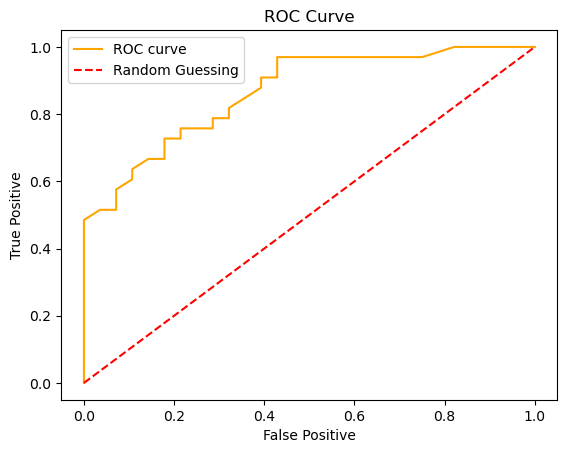

In [131]:
PlotRoc(fpr, tpr)

In [132]:
roc_auc_score(ytest,y_prob_positive)

np.float64(0.8663419913419913)